<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/FAULT_PCA_TEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deimenson Reduction HW2


In [ ]:
#G Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing TEP

In [4]:
##Train
Fault_Free_Trian = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

NameError: ignored

In [3]:
# Applying new viarible for uniformung matrix without head
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

NameError: ignored

In [2]:
# Applying new viarible for uniformung matrix without head
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

NameError: ignored

In [ ]:
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)
Faulty_train

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,20,1,496,0.20006,3708.5,4497.7,9.2167,27.103,42.336,...,53.749,20.049,59.346,15.976,38.463,42.294,44.981,48.511,41.290,21.141
9996,9996,20,1,497,0.31328,3666.5,4483.6,9.2536,26.704,42.172,...,53.607,30.819,60.733,15.283,38.340,38.185,46.823,48.597,41.941,18.724
9997,9997,20,1,498,0.31186,3674.1,4480.6,9.2912,26.986,42.337,...,53.642,30.958,62.280,14.792,38.143,32.580,45.048,48.664,41.112,16.435
9998,9998,20,1,499,0.30026,3690.1,4519.3,9.2301,26.858,42.376,...,53.440,29.814,59.285,14.388,39.685,36.612,43.100,48.896,41.682,18.685


## Data Basic Function

### Head

In [ ]:
Faulty_train.head(21)

### Describe

In [ ]:
Fault_Free_Trian.describe()

### Remove Column

In [ ]:
# Remmoving by Drop
Fault_Free_Trian.drop('simulationRun', axis=1).head()

In [ ]:
# choosing some rows and comlumns
N_Faulty_Test = Faulty_Test.iloc[1:100,1:10]
N_Faulty_Test

In [ ]:
# Mean and STD Calculation from Numpy
a= Fault_Free_Trian['xmeas_1'].values

mean = np.mean(a)
std = np.std(a)

print(mean)
print(std)

0.25004377083333335
0.027823315450460177


##Scalling the Data


### Train Data Scailling

### Dropping

In [ ]:
Fault_Free_Trian.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
Faulty_train.drop(['Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
Fault_Free_Test.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
Faulty_Test.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)

In [ ]:
np.shape(Faulty_train)

(10000, 52)

### Scaling with Standard Scaler Train Data on Faulty Determined Classes and Choosen Varibales from Preprocessing in last HW with standard Dev adn Outliers

In [ ]:
##Scaling Data
our_faulty_classes= Faulty_train[(Faulty_train.faultNumber==1)|
                                 (Faulty_train.faultNumber==3 )|
                                 (Faulty_train.faultNumber==5 )|
                                 (Faulty_train.faultNumber==7 )|
                                 (Faulty_train.faultNumber==9 )|
                                 (Faulty_train.faultNumber==11 )|
                                 (Faulty_train.faultNumber==13)|
                                 (Faulty_train.faultNumber==15 )|
                                 (Faulty_train.faultNumber==17)|
                                 (Faulty_train.faultNumber==19)].iloc[:,4:]
our_faulty_classes.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)


ff = our_faulty_classes
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

In [ ]:
our_faulty_classes.iloc[:,-1]

0       47.510
1       47.427
2       47.468
3       47.658
4       47.346
         ...  
9495    49.573
9496    49.837
9497    49.921
9498    50.185
9499    50.659
Name: xmv_9, Length: 5000, dtype: float64

## Plotting Histograms for Varibales

## PCA

### PCA for Arbitrary Componants

In [ ]:
##PCA Function
n_components =10
pca = PCA(n_components=n_components)
pca
##PCA Data Shape Transformed
Xt = pca.fit_transform(tr_s)
print('Original Data Shape :',tr_s.shape)
print('PC Data Shape:',Xt.shape)
print('PCA Singular Values:',pca.singular_values_)
print('Vairiance Ratio:',pca.explained_variance_ratio_)

Original Data Shape : (5000, 34)
PC Data Shape: (5000, 10)
PCA Singular Values: [219.29752264 162.94624959 144.37225967  91.72618753  81.3634989
  79.01859675  74.40661445  72.85381554  71.58487724  68.32254267]
Vairiance Ratio: [0.28289061 0.15618518 0.12260794 0.04949231 0.03894129 0.03672905
 0.03256673 0.03122164 0.0301435  0.02745865]


### Visualizing PCA Arbitrary Components

### SVDs print and plot

Singular Values: [219.29752264 162.94624959 144.37225967  91.72618753  81.3634989
  79.01859675  74.40661445  72.85381554  71.58487724  68.32254267]


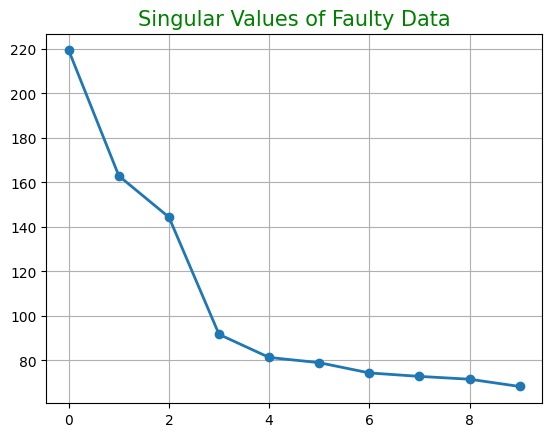

In [ ]:
"""
SVDs print and plot
"""
v=pca.singular_values_
plt.plot(np.sort(v)[::-1],'o-',linewidth=2)
plt.grid()
font1 = {'color':'g','size':15}
plt.title('Singular Values of Faulty Data',fontdict = font1)
print('Singular Values:',pca.singular_values_)

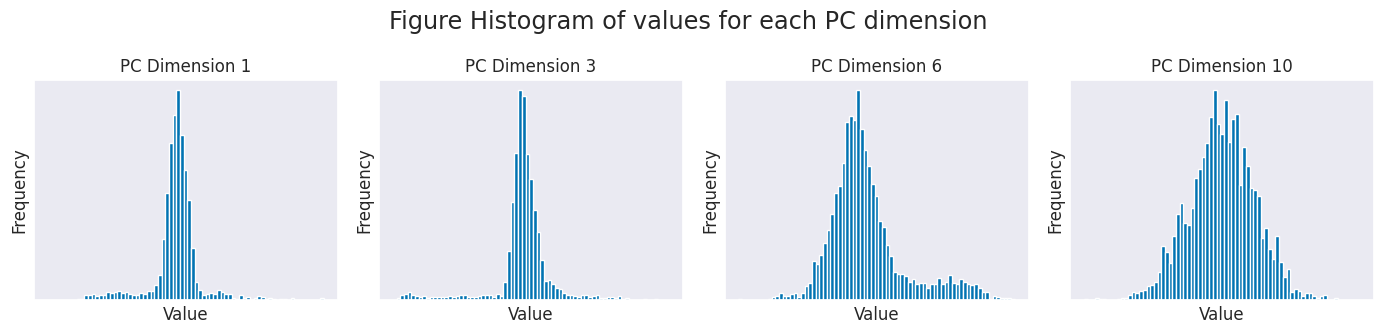

In [ ]:
""" Componants Plot
"""
# Setting plotting parameter
n_bins=75

# Plot
n_plots = 4
components_to_plot = [0,2,5,9]
f, axes = plt.subplots(1, n_plots, figsize=(14, 14/n_plots))
st=f.suptitle("Figure Histogram of values for each PC dimension ", fontsize="x-large")

for i in range(n_plots):
    axes[i].hist(Xt[:, components_to_plot[i]],
                 bins=n_bins)
    # mark the plots
    axes[i].set_title('PC Dimension %d'%(components_to_plot[i]+1))
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

f.tight_layout()
st.set_y(0.95)
f.subplots_adjust(top=0.75)

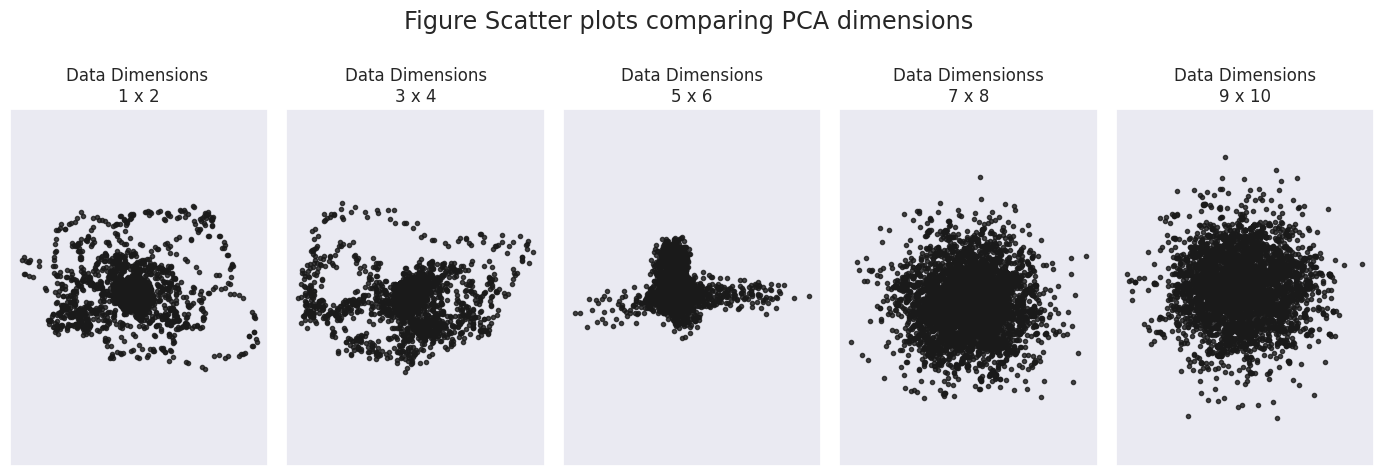

In [ ]:
"""
Comparing PCA Dimensions
"""
# Setting plotting parameters
alpha_val = .8


# Plot
n_plots = 5
f, axes = plt.subplots(1, n_plots, figsize=(14,5))
st=f.suptitle("Figure Scatter plots comparing PCA dimensions ", fontsize="x-large")

# plot data
axes[0].scatter(Xt[:, 0], Xt[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
axes[1].scatter(Xt[:, 2], Xt[:, 3],
                alpha=alpha_val, marker='.', color = 'k')
axes[2].scatter(Xt[:, 4], Xt[:, 5],
                alpha=alpha_val, marker='.', color = 'k')
axes[3].scatter(Xt[:, 6], Xt[:, 7],
                alpha=alpha_val, marker='.', color = 'k')
axes[4].scatter(Xt[:, 8], Xt[:, 9],
                alpha=alpha_val, marker='.', color = 'k')

axes[0].set_title('Data Dimensions \n1 x 2')
axes[1].set_title('Data Dimensions\n3 x 4')
axes[2].set_title('Data Dimensions\n5 x 6')
axes[3].set_title('Data Dimensionss\n7 x 8')
axes[4].set_title('Data Dimensions\n9 x 10')

# modifications that are common to all plots
for i in range(n_plots):
    axes[i].axis('equal')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

f.tight_layout()
st.set_y(0.95)
f.subplots_adjust(top=0.75)

<ipython-input-67-6a0ec12922f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


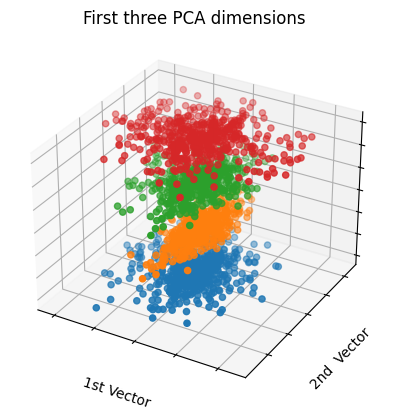

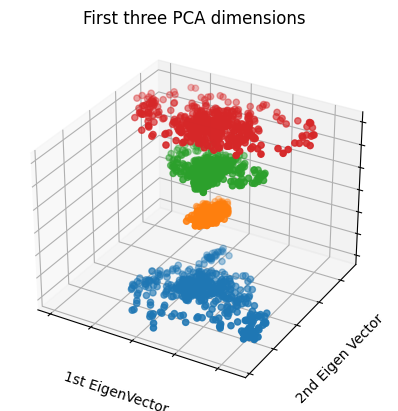

In [ ]:
import mpl_toolkits.mplot3d
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)
our_faulty_classes_2= Faulty_train[(Faulty_train.faultNumber==1)|
                                 (Faulty_train.faultNumber==3 )|
                                 (Faulty_train.faultNumber==5 )|
                                 (Faulty_train.faultNumber==7 )|
                                 (Faulty_train.faultNumber==9 )|
                                 (Faulty_train.faultNumber==11 )|
                                 (Faulty_train.faultNumber==13)|
                                 (Faulty_train.faultNumber==15 )|
                                 (Faulty_train.faultNumber==17)|
                                 (Faulty_train.faultNumber==19)]
our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
# _,ax = plt.subplots()
#Feature
n1=1
n2=3
#Determining Classes
Cl_1=0
Cl_2=500
Cl_3=1000
Cl_4=1500
Cl_5=2000
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(tr_s[Cl_1:Cl_2, n1],tr_s[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(tr_s[Cl_2:Cl_3, n1],tr_s[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(tr_s[Cl_3:Cl_4, n1],tr_s[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(tr_s[Cl_4:Cl_5, n1],tr_s[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Vector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd  Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Vector")
ax.zaxis.set_ticklabels([])
fig = plt.figure(2)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(Xt[Cl_1:Cl_2, n1],Xt[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(Xt[Cl_2:Cl_3, n1],Xt[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(Xt[Cl_3:Cl_4, n1],Xt[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(Xt[Cl_4:Cl_5, n1],Xt[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st EigenVector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigen Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()